## **Building a Deep Neural Network for Image Classification with MNIST Dataset**

In this article, we delve into the process of constructing a deep neural network (DNN) using Python and NumPy to perform image classification tasks on the MNIST dataset. The implementation covers key aspects of deep learning, including data preprocessing, mini-batch creation, activation functions, parameter initialization, forward and backward propagation, optimization techniques, training, evaluation, and result visualization.

### **Introduction**

The MNIST dataset is a popular benchmark in the field of machine learning, consisting of handwritten digit images. Our objective is to develop a DNN capable of accurately recognizing and classifying these digit images.

#### **Data Preprocessing**

We begin by loading the MNIST dataset from a CSV file using the Pandas library. The dataset contains pixel values of grayscale images along with corresponding labels. After loading the data, we perform the following preprocessing steps:

- Rename the label column to 'label' for clarity.

- Convert the dataset into a NumPy array and transpose it for easier manipulation.

- Separate the labels **(`target`)** from the features **(`features`)**.

- Normalize the pixel values of the images by scaling them to a range between 0 and 1.

Our analysis will commence by importing the requisite libraries followed by loading the data.

In [1]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the MNIST dataset
data = pd.read_csv('/content/sample_data/mnist_train_small.csv')
data = data.rename(columns={'6':'label'}) # Rename the label column for clarity

# Display a few couple of rows
data.head()

,label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Upon completion of the data import process, we proceed to convert the dataset into a NumPy array and transpose it to enhance data manipulation capabilities. Subsequently, we extract the labels and features from the dataset. The labels are discerned from the first column of the transposed array, while the features are obtained from the remaining columns.

In [3]:
# Convert data to NumPy array and transpose for easier manipulation
data = np.array(data)
data = data.T

In [4]:
# Extract labels and features
label = data[0]

number_classes = len(np.unique(data[0]))
target = np.eye(number_classes)[label]
target = target.T

In [5]:
# Normalize features by scaling to range [0, 1]
features = data[1:]
features = np.divide(features, 255.0)

#### **Mini-Batch Creation**

To efficiently train our neural network, we implement a function to generate random mini-batches of data. This technique is essential when working with large datasets, as it enables us to perform mini-batch gradient descent during the training process. By randomly selecting smaller subsets of the data, we are able to optimize the performance of the neural network and minimize training time.

In [6]:
def random_mini_batches(X, Y, validation_split=0.2, mini_batch_size=32, seed=0):

  np.random.seed(seed)  # Set seed for reproducibility
  m = X.shape[1]  # Total number of examples
  m_val = int(m * validation_split)  # Number of validation examples

  # Shuffle indices
  permutation = np.random.permutation(m)
  shuffled_X = X[:, permutation]
  shuffled_Y = Y[:, permutation]

  # Split into training and validation sets
  X_train = shuffled_X[:, m_val:]
  Y_train = shuffled_Y[:, m_val:]
  X_val = shuffled_X[:, :m_val]
  Y_val = shuffled_Y[:, :m_val]

  # Generate random mini-batches for training data
  num_complete_minibatches_train = X_train.shape[1] // mini_batch_size
  mini_batches_train = []

  for k in range(num_complete_minibatches_train):
      mini_batch_X_train = X_train[:, k * mini_batch_size : (k + 1) * mini_batch_size]
      mini_batch_Y_train = Y_train[:, k * mini_batch_size : (k + 1) * mini_batch_size]
      mini_batches_train.append((mini_batch_X_train, mini_batch_Y_train))

  # Handling the end case (last mini-batch < mini_batch_size) for training
  if X_train.shape[1] % mini_batch_size != 0:
      mini_batch_X_train = X_train[:, num_complete_minibatches_train * mini_batch_size :]
      mini_batch_Y_train = Y_train[:, num_complete_minibatches_train * mini_batch_size :]
      mini_batches_train.append((mini_batch_X_train, mini_batch_Y_train))

  # Generate random mini-batches for validation data
  num_complete_minibatches_val = X_val.shape[1] // mini_batch_size
  mini_batches_val = []

  for k in range(num_complete_minibatches_val):
      mini_batch_X_val = X_val[:, k * mini_batch_size : (k + 1) * mini_batch_size]
      mini_batch_Y_val = Y_val[:, k * mini_batch_size : (k + 1) * mini_batch_size]
      mini_batches_val.append((mini_batch_X_val, mini_batch_Y_val))

  # Handling the end case (last mini-batch < mini_batch_size) for validation
  if X_val.shape[1] % mini_batch_size != 0:
      mini_batch_X_val = X_val[:, num_complete_minibatches_val * mini_batch_size :]
      mini_batch_Y_val = Y_val[:, num_complete_minibatches_val * mini_batch_size :]
      mini_batches_val.append((mini_batch_X_val, mini_batch_Y_val))

  return mini_batches_train, mini_batches_val

mini_batches_train, mini_batches_val = random_mini_batches(features, target, validation_split=0.2, mini_batch_size=32, seed=0)

print(f"Shape of train batches: {len(mini_batches_train)}")
print(f"Shape of validation batches: {len(mini_batches_val)}")

Shape of train batches: 500
Shape of validation batches: 125


#### **Activation Functions**

In deep neural networks, various activation functions play a crucial role within the network layers to introduce non-linearity, allowing the model to capture complex patterns and representations. Activation functions such as:

- **`Swish`**
- **`Leaky ReLU`**
- **`Softmax`**

transform the input signal at each neuron, enabling the network to model and learn intricate relationships in the data.

In [7]:
# Sigmoid activation function (essential for Swish activation function)
def Sigmoid(z):
  return 1 / (1 + (np.exp(-z)))


# Swish activation function: Combines sigmoid with input 'z' multiplied by a scaling factor 'gamma'
def Swish(z, gamma=1):
  return z * Sigmoid(z * gamma)


# Derivative of Swish activation function
def Swish_derivative(z, gamma=1):
  return Sigmoid(z * gamma) + z * (1 - Sigmoid(z * gamma))


# Leaky ReLU activation function: Introduces a small negative slope ('alpha') for negative inputs
def Leaky_ReLU(z, alpha=0.01):
  return np.maximum(z, z * alpha)


# Derivative of Leaky ReLU activation function
def Leaky_ReLU_derivative(z, alpha=0.01):
  return np.where(z > 0, 1, alpha)


# Softmax activation function: Computes probabilities for multiple classes using 'z' values
def Softmax(z):
  exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))  # Avoid Overflow
  return exp_z / np.sum(exp_z, axis=0, keepdims=True)

#### **Parameter Initialization**

The neural network's parameters (weights and biases) are initialized before training begins. This process of initialization involves setting random starting values for the parameters, which are then adjusted during training in order to improve the network's performance. Proper initialization is crucial for effective learning and convergence.

Within the following function, we employ the utilization of a random normal distribution in order to initialize weights, with small values, whereas biases are set as zeros.

This methodology serves to ensure that the weights of the function are not only randomized, but also relatively small in order to facilitate the training process.

By setting biases as zeros, we are able to eliminate any potential bias that may be introduced into the model, thereby allowing for the function to accurately and reliably model the desired output.

In [8]:
def initialize_parameters(input_size, first_hidden_size, second_hidden_size, output_size):

  W1 = np.random.randn(first_hidden_size, input_size) * 0.01  # Multiply by a small factor
  b1 = np.zeros((first_hidden_size, 1))

  W2 = np.random.randn(second_hidden_size, first_hidden_size) * 0.01
  b2 = np.zeros((second_hidden_size, 1))

  W3 = np.random.randn(output_size, second_hidden_size) * 0.01
  b3 = np.zeros((output_size, 1))

  parameters = {'W1':W1,
                'b1':b1,
                'W2':W2,
                'b2':b2,
                'W3':W3,
                'b3':b3}

  return parameters

#### **Forward Propagation**

During forward propagation, input data is passed through the network layers, and activations are computed using the initialized parameters and activation functions.

In [9]:
def forward_propagation(X, parameters):

  # Retrieve weights and biases from parameters dictionary
  W1, b1 = parameters['W1'], parameters['b1']
  W2, b2 = parameters['W2'], parameters['b2']
  W3, b3 = parameters['W3'], parameters['b3']

  # Perform linear transformations and activation functions
  z1 = np.dot(W1, X) + b1
  a1 = Swish(z1)
  z2 = np.dot(W2, a1) + b2
  a2 = Leaky_ReLU(z2)
  z3 = np.dot(W3, a2) + b3
  a3 = Softmax(z3)

  forward_cache = {'z1':z1,
                   'a1':a1,
                   'z2':z2,
                   'a2':a2,
                   'z3':z3,
                   'a3':a3}

  return a3, forward_cache

#### **Cost Function**

In the field of machine learning, training a model involves a crucial step that requires the use of a cost function, also known as a loss function. This function quantifies the disparity between predicted outputs and ground truth labels, and serves as a metric to evaluate the model's performance.

In [10]:
def compute_cost(a3, y, parameters, penalty, epsilon=1e-8):

  # Retrieve model parameters
  W1 = parameters['W1']
  W2 = parameters['W2']
  W3 = parameters['W3']

  # Number of examples in the dataset
  n = y.shape[1]

  # Compute log probabilities
  logprobs = np.multiply(-np.log(a3 + epsilon), y)
  cost = np.mean(logprobs)

  # Compute regularization term
  regularized_cost = np.divide(penalty, np.multiply(2, n)) * (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))
  total_cost = cost + regularized_cost

  return total_cost

#### **Backward propagation**

During the training of a neural network, the backpropagation algorithm is used to calculate the gradients of the loss function with respect to each parameter in the network. These gradients are then used to update the parameters in the network, which ultimately leads to an improvement in the network's ability to make accurate predictions. The backpropagation algorithm works by computing the derivatives of the loss function with respect to each weight in the network, and then propagating these derivatives backwards through the network to update the weights. This process is repeated many times during training, gradually improving the network's performance until it reaches a satisfactory level.

In [11]:
def backpropagation(X, y, parameters, forward_cache, penalty):

  W1 = parameters['W1']
  W2 = parameters['W2']
  W3 = parameters['W3']

  z1 = forward_cache['z1']
  a1 = forward_cache['a1']
  z2 = forward_cache['z2']
  a2 = forward_cache['a2']
  a3 = forward_cache['a3']

  m = X.shape[1]  # Number of training examples

  # gradients for output layer
  dZ3 = a3 - y
  dW3 = np.dot(dZ3, a2.T) / m + np.multiply(np.divide(penalty, m), W3)
  db3 = np.sum(dZ3, axis=1, keepdims=True) / m

  # gradients for second hidden layer
  dZ2 = np.dot(W3.T, dZ3) * Leaky_ReLU_derivative(z2)
  dW2 = np.dot(dZ2, a1.T) / m + np.multiply(np.divide(penalty, m), W2)
  db2 = np.sum(dZ2, axis=1, keepdims=True) / m

  # gradients for first hidden layer
  dZ1 = np.dot(W2.T, dZ2) * Swish_derivative(z1)
  dW1 = np.dot(dZ1, X.T) / m + np.multiply(np.divide(penalty, m), W1)
  db1 = np.sum(dZ1, axis=1, keepdims=True) / m

  gradients = {'dW1':dW1,
               'db1':db1,
               'dW2':dW2,
               'db2':db2,
               'dW3':dW3,
               'db3':db3}

  return gradients

#### **Adam Optimization**

Our network optimization process employs the Adam algorithm. This technique amalgamates the benefits of momentum and RMSprop methods, facilitating efficient updates of network parameters.

The Adam algorithm uses adaptive learning rates to update network parameters efficiently, which allows it to converge faster than other optimization algorithms.

In [12]:
def initialize_adam(parameters):

  # Empty dictionaries
  velocity = {}
  cache = {}

  # Initialize velocity and cache with zeros of the same shape as the parameter
  for key, value in parameters.items():
    velocity[key] = np.zeros_like(value)
    cache[key] = np.zeros_like(value)

  return velocity, cache

#### **Updating Parameters**

The Adam optimization algorithm, upon computing gradients, adjusts the model parameters by integrating both the first-moment estimate, or momentum, and the second-moment estimate, or RMSprop, of the gradients.

The algorithm applies individual learning rates to each parameter and adapts the updates based on the accumulated past gradients and squared gradients.

In addition, bias-correction terms are incorporated into the algorithm to prevent the optimization process from becoming trapped in local minima.

In [13]:
def update_parameters(parameters, gradients, velocity, cache, learning_rate, decay_rate, current_iteration, momentum_coefficient=0.9, rmsprop_coefficient=0.999, epsilon=1e-8):

  # beta1 and beta2 based on specified coefficients
  beta1 = momentum_coefficient
  beta2 = rmsprop_coefficient

  corrected_velocity = {}
  corrected_cache = {}

  # Compute decayed learning rate
  learning_rate_decay = learning_rate / (1 + decay_rate * current_iteration)

  # Update velocity with momentum term and cache with RMSprop term
  for parameter in parameters:

    velocity[parameter] = beta1 * velocity[parameter] + (1 - beta1) * gradients['d' + parameter]
    corrected_velocity[parameter] = velocity[parameter] / (1 - beta1)

    cache[parameter] = beta2 * cache[parameter] + (1 - beta2) * (gradients['d' + parameter] ** 2)
    corrected_cache[parameter] = cache[parameter] / (1 - beta2)

    parameters[parameter] -= learning_rate_decay * corrected_velocity[parameter] / (np.sqrt(corrected_cache[parameter]) + epsilon)

  return parameters, velocity, cache

#### **Making Predictions**

In order to assess the efficacy of our model, we will perform iterative tests and monitor its progress. To accomplish this, we have developed a predictive function, which will be evaluated using Accuracy as the chosen Evaluation Metric to determine the model's performance.

In [14]:
def predict(x, parameters):
  a3, _ = forward_propagation(x, parameters)
  return np.argmax(a3, axis=0)  # Get the prediction with the highest probability

In [15]:
def accuracy_score(prediction, label):

  # Calculate the proportion of corrected labels
  return np.mean(prediction == np.argmax(label, axis=0))

#### **Plotting Training / Validation Cost Function**

Within the following function, we will generate a visual representation of the performance of the Cost Function. This will include both the Training and Validation phases.

In [16]:
def plot_cost_graph(train_cost_history, val_cost_history):

  # Plot the cost in each iteration (loss)
  sns.set_theme(style='darkgrid')
  train_iterations = len(train_cost_history)
  val_iterations = len(val_cost_history)
  plt.figure(figsize=(22, 8))
  plt.plot(range(train_iterations), train_cost_history, label='Training Cost', color='blue')
  plt.plot(range(val_iterations), val_cost_history, label='Validation Cost', color='red')
  plt.title('Cost vs. Iterations')
  plt.xlabel('Iterations')
  plt.ylabel('Cost')
  plt.grid(True)
  plt.legend()
  plt.show();

#### **Training the Neural Network**

The DNN is trained using mini-batch gradient descent with Adam optimization. Training involves iterating over the dataset for a specified number of epochs, computing forward and backward passes, and updating network parameters.

In [17]:
def mini_batch_gradient_descent(X_train, Y_train, input_size, first_hidden_size, second_hidden_size, output_size, penalty, learning_rate, iterations, mini_batch_size=32, decay_rate=0.1):

  parameters = initialize_parameters(input_size, first_hidden_size, second_hidden_size, output_size)
  velocity, cache = initialize_adam(parameters)

  # Store the cost of both sets
  train_cost_history = []
  val_cost_history = []

  for epoch in range(iterations):
    epoch_cost = 0  # Initialize the cost for both Training / validation sets
    val_epoch_cost = 0
    seed = epoch  # Set seed for reproducibility of mini-batches

    mini_batches_train, _ = random_mini_batches(X_train, Y_train, mini_batch_size=mini_batch_size, seed=seed)

    for mini_batch_X, mini_batch_Y in mini_batches_train:
      # Compute Forwardpropagation
      a3, forward_cache = forward_propagation(mini_batch_X, parameters)

      # Compute Training Cost
      cost = compute_cost(a3, mini_batch_Y, parameters, penalty)
      epoch_cost += cost

      # Backpropagation
      gradients = backpropagation(mini_batch_X, mini_batch_Y, parameters, forward_cache, penalty)

      # Updating
      parameters, velocity, cache = update_parameters(parameters, gradients, velocity, cache, learning_rate, decay_rate, epoch)

    epoch_cost /= len(mini_batches_train)
    train_cost_history.append(epoch_cost)

    # Validation
    for mini_batch_X_val, mini_batch_Y_val in mini_batches_val:
      a3_val, forward_cache = forward_propagation(mini_batch_X_val, parameters)

      val_cost = compute_cost(a3_val, mini_batch_Y_val, parameters, penalty)
      val_epoch_cost += val_cost

    val_epoch_cost /= len(mini_batches_val)
    val_cost_history.append(val_epoch_cost)

    if epoch % 10 == 0:
      print(f"Epoch {epoch}: Train Cost = {epoch_cost:.4}, Validation Cost = {val_epoch_cost:.4}")

  return parameters, train_cost_history, val_cost_history

input_size = features.shape[0]
first_hidden_size = 64
second_hidden_size = 32
output_size = number_classes  # Number of classes

penalty = 0.001
learning_rate = 0.0001
num_epochs = 200
mini_batch_size = 32
decay_rate = 0.001

Epoch 0: Train Cost = 0.1986, Validation Cost = 0.1554
Epoch 10: Train Cost = 0.06618, Validation Cost = 0.06583
Epoch 20: Train Cost = 0.05563, Validation Cost = 0.05585
Epoch 30: Train Cost = 0.04864, Validation Cost = 0.04932
Epoch 40: Train Cost = 0.04326, Validation Cost = 0.04427
Epoch 50: Train Cost = 0.03896, Validation Cost = 0.04021
Epoch 60: Train Cost = 0.03663, Validation Cost = 0.03715
Epoch 70: Train Cost = 0.03345, Validation Cost = 0.03479
Epoch 80: Train Cost = 0.03258, Validation Cost = 0.03306
Epoch 90: Train Cost = 0.03058, Validation Cost = 0.03174
Epoch 100: Train Cost = 0.02979, Validation Cost = 0.03068
Epoch 110: Train Cost = 0.02848, Validation Cost = 0.02979
Epoch 120: Train Cost = 0.02785, Validation Cost = 0.02902
Epoch 130: Train Cost = 0.02697, Validation Cost = 0.0282
Epoch 140: Train Cost = 0.02624, Validation Cost = 0.02772
Epoch 150: Train Cost = 0.02569, Validation Cost = 0.02706
Epoch 160: Train Cost = 0.02559, Validation Cost = 0.02656
Epoch 170: 

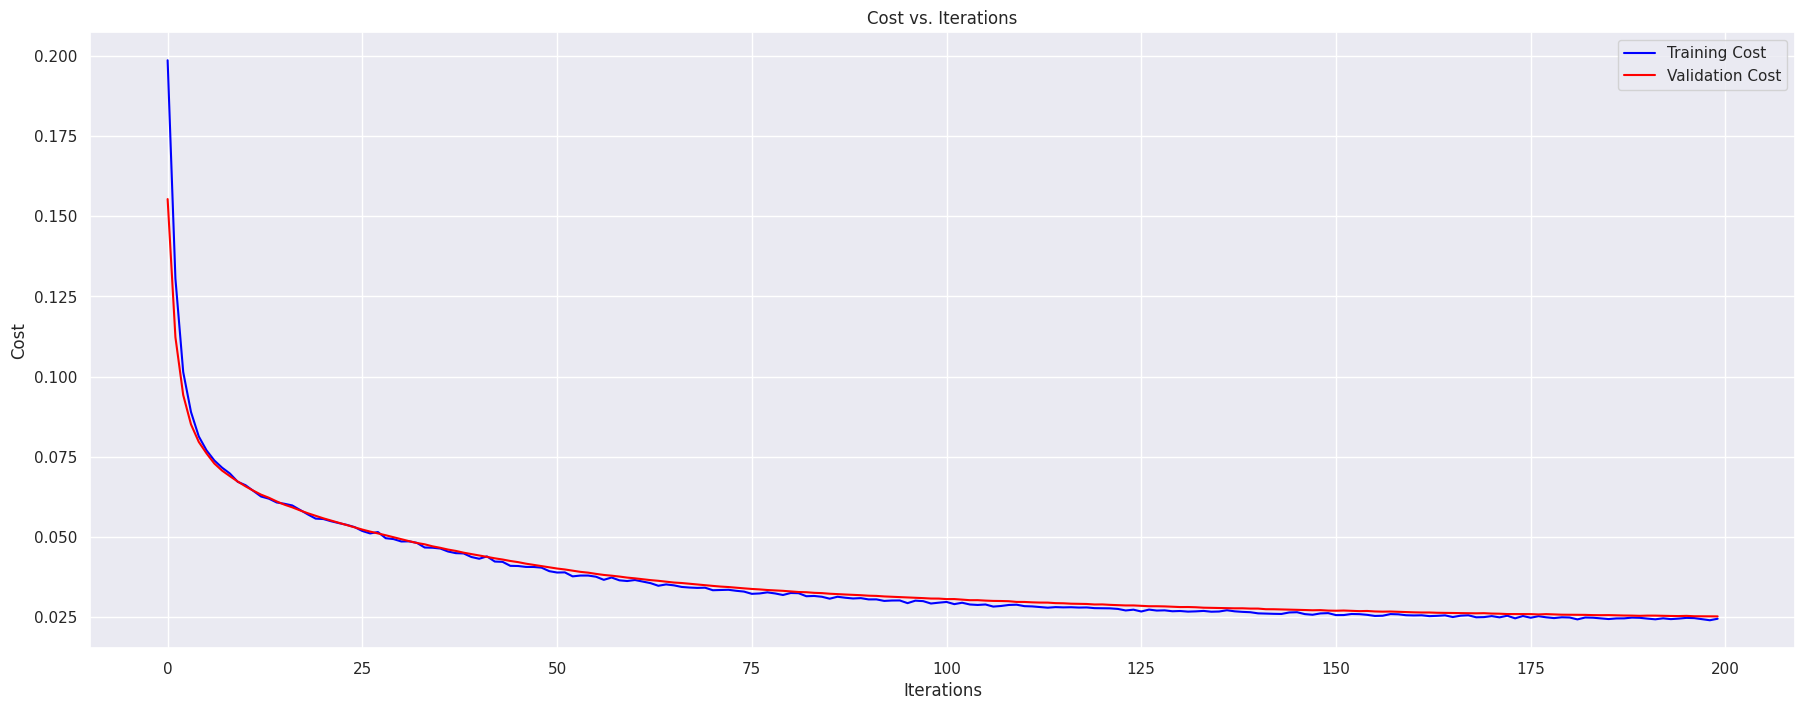

Training accuracy: 0.9538
Validation accuracy: 0.9525


In [18]:
# Perform gradient descent
trained_parameters, train_cost_history, val_cost_history = mini_batch_gradient_descent(features, target, input_size, first_hidden_size, second_hidden_size, output_size, penalty, learning_rate, num_epochs, mini_batch_size, decay_rate)

# Plot cost history
plot_cost_graph(train_cost_history, val_cost_history)

# Make predictions and evaluate accuracy
predictions_train = predict(features, trained_parameters)
accuracy_train = accuracy_score(predictions_train, target)
print(f"Training accuracy: {accuracy_train:.4}")

# Extract x and y components from each mini-batch in validation set
X_val_list = []
y_val_list = []
for mini_batch_X, mini_batch_Y in mini_batches_val:
    X_val_list.append(mini_batch_X)
    y_val_list.append(mini_batch_Y)

# Concatenate the extracted lists into single arrays
X_val = np.concatenate(X_val_list, axis=1)
y_val = np.concatenate(y_val_list, axis=1)

# Make predictions on the combined validation set
predictions_val = predict(X_val, trained_parameters)

# Calculate accuracy on the validation set
accuracy_val = accuracy_score(predictions_val, y_val)
print(f"Validation accuracy: {accuracy_val:.4}")

#### **Evaluation and Visualization**

After training, we evaluate the model's performance on both training and validation datasets by computing accuracy scores and visualizing training/validation costs over epochs.

In [19]:
def get_predictions(A2):
  return np.argmax(A2, 0)

def make_predictions(X, parameters):
  A2, _ = forward_propagation(X, parameters)
  predictions = get_predictions(A2)
  return predictions

def validation_prediction(index, parameters):
  sns.set_theme(style='dark')
  current_image = X_val[:, index, None]
  prediction = make_predictions(X_val[:, index, None], parameters)
  label_index = np.argmax(y_val[:, index])  # Find index of the maximum value in the one-hot encoded label
  label = label_index  # Assign the numerical label

  print("Prediction: ", prediction)
  print("Label: ", label)

  current_image = current_image.reshape((28, 28)) * 255
  plt.gray()
  plt.imshow(current_image, interpolation='nearest')
  plt.show();

Prediction:  [1]
Label:  1


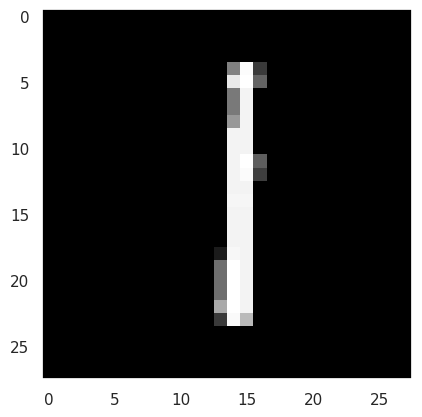

Prediction:  [9]
Label:  9


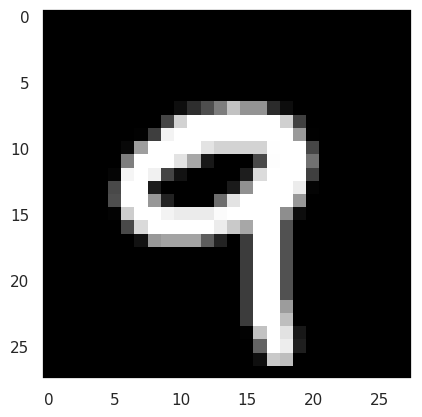

Prediction:  [8]
Label:  8


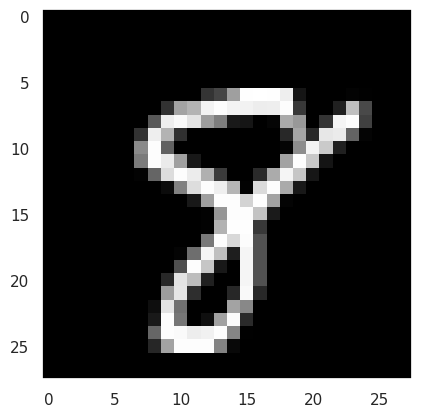

Prediction:  [4]
Label:  4


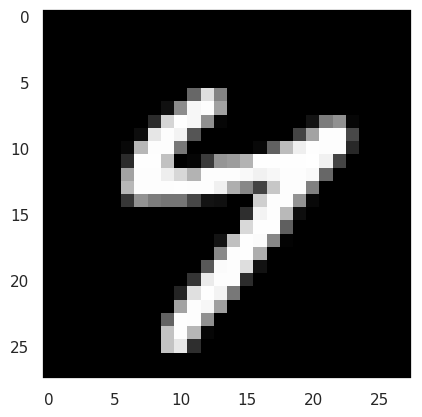

In [20]:
# Call the function
validation_prediction(120, trained_parameters)
validation_prediction(481, trained_parameters)
validation_prediction(62, trained_parameters)
validation_prediction(83, trained_parameters)

#### **Visualizing Wrong Predictions on Validation data**

Let us create a visual representation of the incorrect forecasts. It is essential to note that this visualization will aid in the identification of areas that require improvement and help us to adjust our forecasting models accordingly.

In [21]:
# How many Wrong predictions are estimated by our model?
print(f"The Number of Wrong Predictions: {len(predictions_val != y_val)}")

The Number of Wrong Predictions: 10


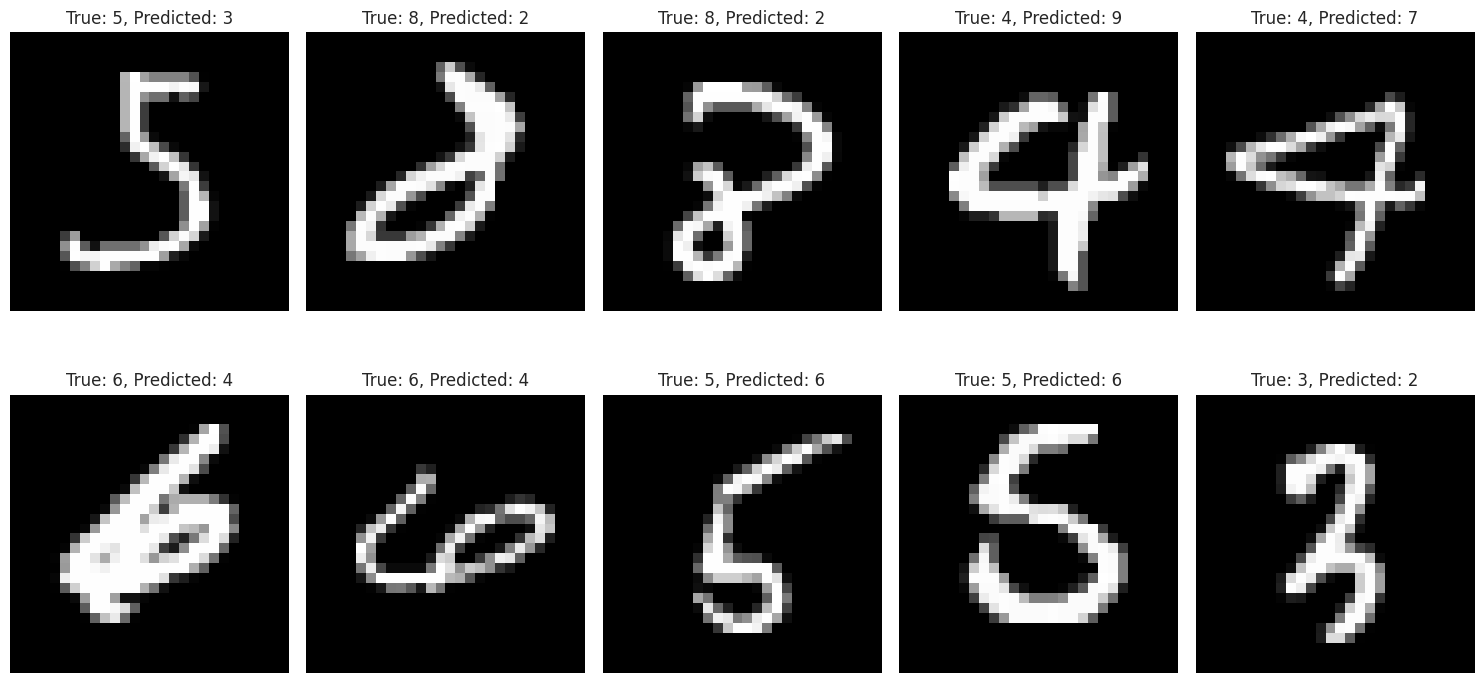

In [22]:
# Identify indices of incorrect predictions
incorrect_indices = np.where(predictions_val != np.argmax(y_val, axis=0))[0]

# Select first 10 incorrect indices (assuming there are at least 10 incorrect predictions)
incorrect_indices = incorrect_indices[:10]

# Plot the incorrect images alongside their correct labels
plt.figure(figsize=(15, 8))
for i, idx in enumerate(incorrect_indices):
    # Get the incorrectly predicted image and its true label
    incorrect_image = X_val[:, idx].reshape((28, 28)) * 255
    true_label = np.argmax(y_val[:, idx])

    # Make prediction for the image
    predicted_label = predictions_val[idx]

    # Plot the incorrect image with its predicted and true labels
    plt.subplot(2, 5, i + 1)
    plt.imshow(incorrect_image, cmap='gray')
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show();

#### **Loading and Preprocessing Test set**

Given the satisfactory performance of the model on the validation data, it can be deemed reliable for making predictions on the entire set of test data.

In a similar manner as we handled our training-validation set, our next step is to load and pre-process our test set.

In [23]:
# Load the Test data
test_data = pd.read_csv('/content/sample_data/mnist_test.csv')

In [24]:
# Preprocess the Test data similar to Train data
test_data = np.array(test_data)
test_data = test_data.T

In [25]:
# Extract the target and One-Hot Encode that
y_test = test_data[0]

number_classes = len(np.unique(test_data[0]))
y_test = np.eye(number_classes)[y_test]
y_test = y_test.T

In [26]:
# Extract and Scale the Pixels for the Test set
x_test = test_data[1:]
x_test = np.divide(x_test, 255.0)

#### **Making / Visualizing Predictions on Test data**

When it comes to evaluating the performance of machine learning models, making predictions on test data is a crucial step. Test data refers to a subset of data that is held out from the model during training, and is used to assess the model's ability to generalize to new, unseen data. By making predictions on the test data, we can measure the accuracy and effectiveness of the model and ensure that it performs well on data it has not seen before.

In [27]:
def get_predictions(A2):
  return np.argmax(A2, 0)

def make_predictions(X, parameters):
  A2, _ = forward_propagation(X, parameters)
  predictions = get_predictions(A2)
  return predictions

def test_prediction(index, parameters):
  sns.set_theme(style='dark')
  current_image = x_test[:, index, None]
  prediction = make_predictions(x_test[:, index, None], parameters)
  label_index = np.argmax(y_test[:, index])  # Find index of the maximum value in the one-hot encoded label
  label = label_index  # Assign the numerical label

  print("Prediction: ", prediction)
  print("Label: ", label)

  current_image = current_image.reshape((28, 28)) * 255
  plt.gray()
  plt.imshow(current_image, interpolation='nearest')
  plt.show();

Prediction:  [5]
Label:  5


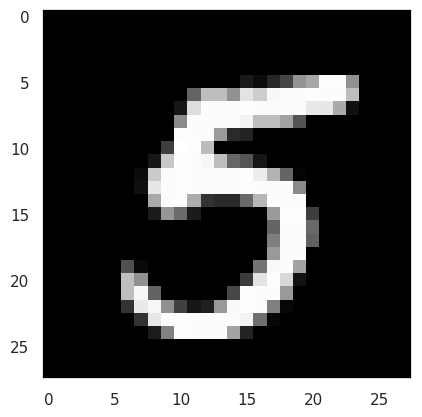

Prediction:  [7]
Label:  7


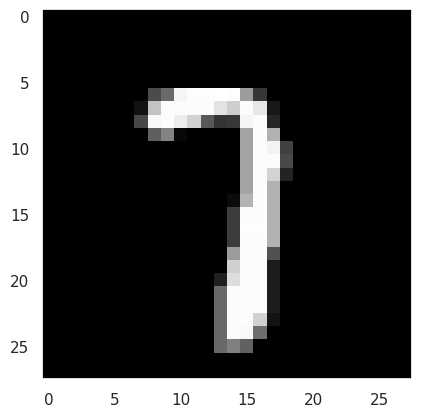

Prediction:  [4]
Label:  4


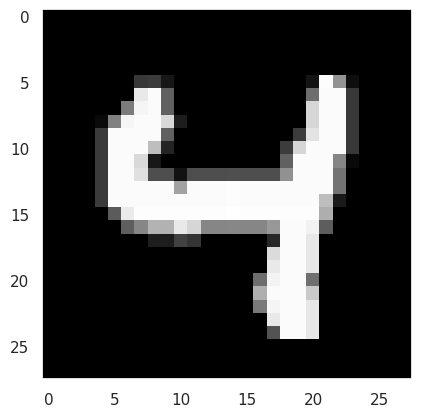

Prediction:  [8]
Label:  8


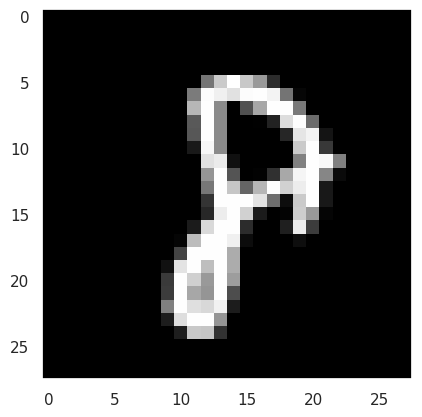

In [28]:
# Call the function
test_prediction(355, trained_parameters)
test_prediction(254, trained_parameters)
test_prediction(718, trained_parameters)
test_prediction(600, trained_parameters)

#### **Visualizing Wrong Predictions on Test data**

One way to gain insights into the performance of a machine learning model is to visualize its wrong predictions on test data. This involves creating visualizations that highlight instances where the model made incorrect predictions, which can help identify patterns and areas of improvement.

We'll tally up the incorrect forecasts and display them visually.

In [29]:
def predict(x_test, trained_parameters):
  a2, _ = forward_propagation(x_test, trained_parameters)
  return np.argmax(a2, axis=0)

predictions = predict(x_test, trained_parameters)

In [30]:
# Number of wrong predictions
print(f"The Number of Wrong Predictions: {len(predictions != y_test)}")

The Number of Wrong Predictions: 10


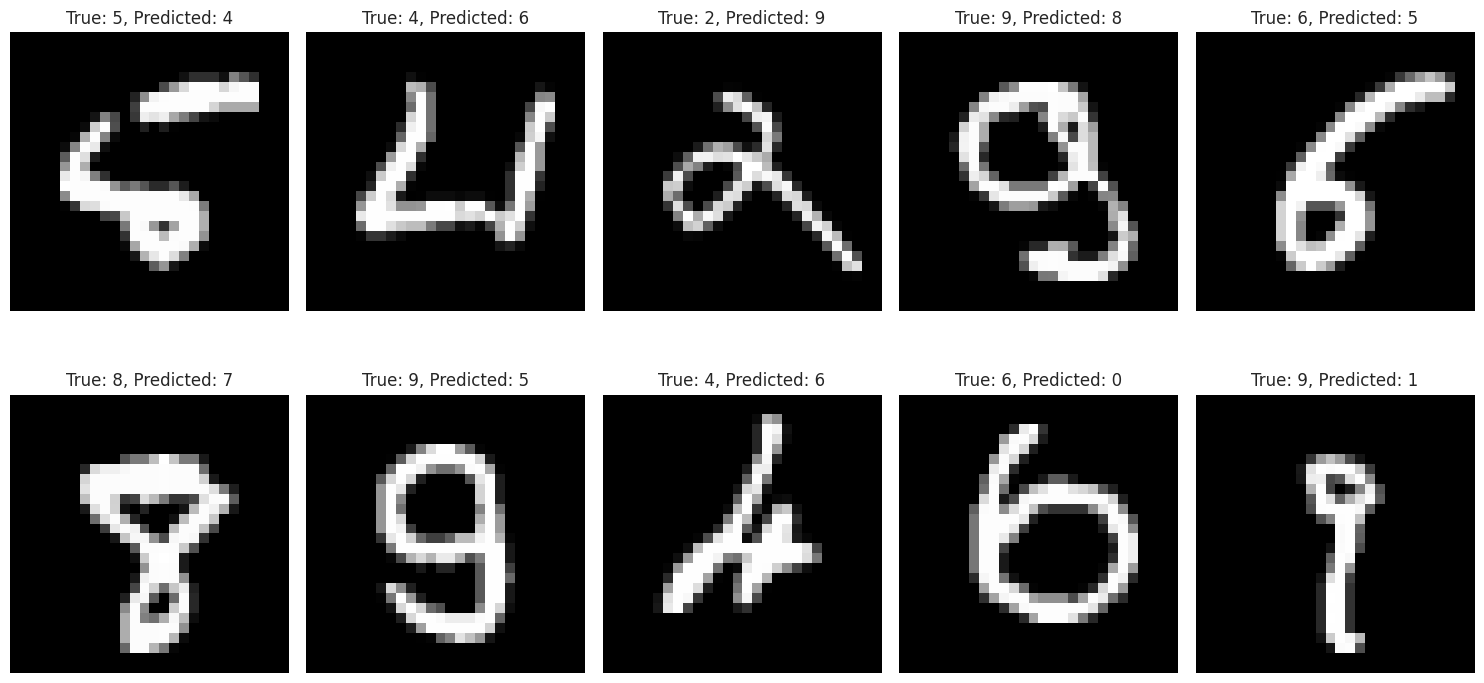

In [31]:
# Identify indices of incorrect predictions
incorrect_indices = np.where(predictions != np.argmax(y_test, axis=0))[0]

# Select first 10 incorrect indices (assuming there are at least 10 incorrect predictions)
incorrect_indices = incorrect_indices[:10]

# Plot the incorrect images alongside their correct labels
plt.figure(figsize=(15, 8))
for i, idx in enumerate(incorrect_indices):
    # Get the incorrectly predicted image and its true label
    incorrect_image = x_test[:, idx].reshape((28, 28)) * 255
    true_label = np.argmax(y_test[:, idx])

    # Make prediction for the image
    predicted_label = predictions[idx]

    # Plot the incorrect image with its predicted and true labels
    plt.subplot(2, 5, i + 1)
    plt.imshow(incorrect_image, cmap='gray')
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show();

#### **Accuracy score on Test data**

Let's calculate accuracy score. This score is an important metric that reflects the ability of the model to make correct predictions on previously unseen data.

In [32]:
# Accuracy score on Test data
def predict(x_test, trained_parameters):
  a2, _ = forward_propagation(x_test, trained_parameters)
  return np.argmax(a2, axis=0)

def accuracy_score(predictions, target):
  return np.mean(predictions == np.argmax(target, axis=0))

predictions = predict(x_test, trained_parameters)
print(f"Accuracy on Test set: {accuracy_score(predictions, y_test):.4}")

Accuracy on Test set: 0.9401


### **Conclusion**

*Model Performance Reports:*

> `Training` / `Validation` Accuracy: The high training and validation accuracies (above 95%) suggest that the model has learned meaningful patterns from the data and is performing well across different subsets of the dataset.

> `Test Set Accuracy:` The slightly lower test set accuracy (94.01%) indicates that the model's performance might degrade slightly on completely new, unseen data compared to the validation set. This could be due to inherent variability or differences between the test set and the training/validation sets.


Overall, a consistent accuracy across training, validation, and test sets (with minor fluctuations) indicates a robust model that generalizes well and is likely to perform reliably in practical applications.

In summary, this article provides a comprehensive guide to building a deep neural network for image classification using the MNIST dataset. By leveraging fundamental concepts of deep learning and implementing them in Python, we can develop a robust model capable of accurately recognizing handwritten digits. The described implementation covers essential components of neural networks, from data preprocessing to training and evaluation, making it a valuable resource for understanding and implementing deep learning algorithms.